<a href="https://colab.research.google.com/github/shubhtanna/Assignment/blob/main/MLPrac7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ML prac 7b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df["target"].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


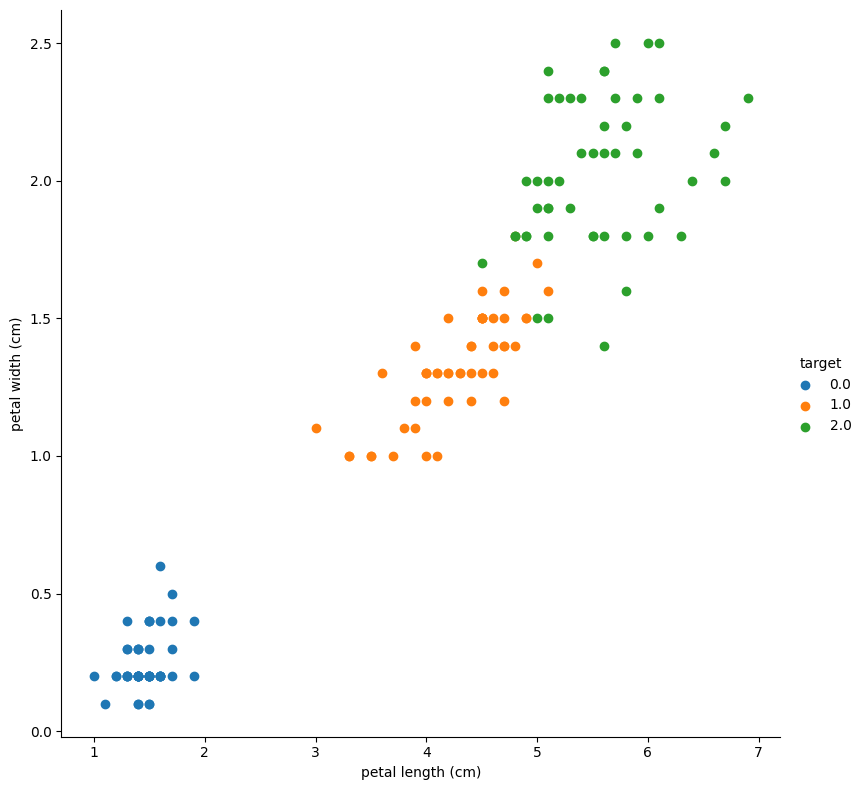

In [ ]:
sns.FacetGrid(df, hue="target", height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [ ]:
#fit a k-nearest neighbor model to the data
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#make predictionsexpected = dataset.target
predicted = model.predict(iris.data)
expected = iris.target
model.score(iris.data, iris.target)

0.96

In [ ]:
#summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [ ]:
x=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



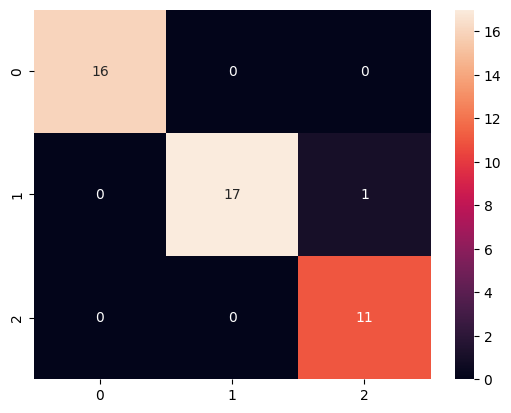

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cls_rpt = classification_report(y_test, y_pred)

print(cm)
sns.heatmap(cm, annot=True)
print(cls_rpt)

In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
params = {'n_neighbors':[3,7,9,11,13,15,17,19,21]}

gscv = GridSearchCV(knn_model, param_grid=params, scoring='accuracy')
gscv.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 7, 9, 11, 13, 15, 17, 19, 21]},
             scoring='accuracy')

In [ ]:
gscv.best_score_

0.9619047619047618

In [ ]:
gscv.best_params_

{'n_neighbors': 7}

In [ ]:
model = gscv.best_estimator_